We will first need to import NumPy and Pandas.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from sklearn import metrics
from statistics import NormalDist

In [2]:
sys.version

'3.8.2 (default, Mar 26 2020, 15:53:00) \n[GCC 7.3.0]'

Sometimes the data is expressed as mean with standard error (SE) or 95% confidence interval (CI). The standard deviation (SD) can be calculated with the following functions. 

In [3]:
def se_to_sd(se, size):
    """
    Converts Standard Error to Standard deviation.
    Parameters:
        se (float, required): The standard error of the data to be generated.
    Returns:
        float: A float value for the standard deviation.
    """
    sd = se*math.sqrt(size)
    return sd

In [4]:
def ci_to_sd(lowerCI, upperCI, CIval=95, size=100):
    """
    Converts Confidence interval to Mean and Standard deviation.
    Parameters:
        lowerCI (float, required): The lower bound of the confidence interval.
        upperCI (float, required): The upper bound of the confidence interval.
        CIval (float, optional): The confidence level. 
            It must be one of the following values.
            [99.9,99.5,99.0,95.0,90.0,85.0,80.0]
            The default value is 95 for 95% confidence interval.
        size (int, optional): The size of the sample to be generated. 
            The default value is 100.
    Returns:
        float: A float value for Standard deviation.
    """
    Zvals = {99.9:3.291,99.5:2.807,99.0:2.807,95.0:1.960,90.0:1.645,85.0:1.645,80.0:1.282}
    z = Zvals[float(CIval)]
    sd = math.sqrt(size)*(upperCI-lowerCI)/z
    return sd 

Test if this works for FTO genotype data. 

In [5]:
ci_to_sd(lowerCI=0.27, upperCI=0.39, CIval=95, size=1000) # Off by a factor of 2?

1.9360883633683954

Define a function called "datagen" that will create normal distribustion curves given a series of parameters; mean, standard deviation, standard error, confidence intervals, and sample size.

In [6]:
def datagen(mean=None, sd=None, se=None, upperCI=None, lowerCI=None, CIval=95.0, size=100):
    """
    Generates random standard distribution data from mean and standard deviation.
    Parameters:
        mean(float, required): The mean of the data to be generated.
        sd (float, optional): The standard deviation of the data to be generated.
        se (float, optional): The standard error of the data to be generated.
        lowerCI (float, required): The lower bound of the confidence interval.
        upperCI (float, required): The upper bound of the confidence interval.
        CIval (float, optional): The confidence level. 
            It must be one of the following values.
            [99.9,99.5,99.0,95.0,90.0,85.0,80.0]
            The default value is 95 for 95% confidence interval.
        size (int, optional): The size of the sample to be generated. 
            The default value is 100.
    Returns:
        numpy.ndarray: A numpy array with random standard distribution data.
    """
    if type(upperCI)==float:
        sd = ci_to_sd(lowerCI, upperCI, CIval=95, size=100)
    if type(se)==float:
        sd = se_to_sd(se, size)
    randdata = np.random.normal(mean, sd, size)
    return randdata

Define a function called "correctdatatype" that returns float values for the relevant statistical parameters. 

In [7]:
def correctdatatype(mean=None, sd=None, se=None, upperCI=None, lowerCI=None):
    """
    Returns float values for each statistical parameter.
    Parameters:
        mean(int, optional): The mean.
        sd (int, optional): The standard deviation of the data to be generated.
        se (int, optional): The standard error of the data to be generated.
        lowerCI (int, required): The lower bound of the confidence interval.
        upperCI (int, required): The upper bound of the confidence interval.
    Returns:
        float: A float value for mean.
        float: A float value for sd.
        float: A float value for se.
        float: A float value for lowerCI.
        float: A float value for upperCI.
    """    
    if type(mean)==int:
        fmean = float(mean)
    else:
        fmean = mean
    if type(sd)==int:
        fsd = float(sd)
    else:
        fsd = sd
    if type(se)==int:
        fmean = float(fse)
    else: 
        fse = se
    if type(upperCI)==int:
        fuCI = float(upperCI)
    else:
        fuCI = upperCI
    if type(lowerCI)==int:
        flCI = float(lowerCI)
    else:
        flCI = lowerCI
    return fmean, fsd, fse, fuCI, flCI

Define a wrapping function called "compounddata" that generates three datasets simulateously of similar attributes.

In [8]:
def compounddata(mean1=None,sd1=None,se1=None,upperCI1=None,lowerCI1=None,CIval1=95.0,
            mean2=None,sd2=None,se2=None,upperCI2=None,lowerCI2=None,CIval2=95.0,
            mean3=None,sd3=None,se3=None,upperCI3=None,lowerCI3=None,CIval3=95.0,
               size=1000):
    """
    A partial wrapper function to generate three datasets of similar attributes.
    Parameters:
        mean1(int/float, optional): The mean.
        sd1 (int/float, optional): The standard deviation of the data to be generated.
        se1 (int/float, optional): The standard error of the data to be generated.
        lowerCI1 (int/float, optional): The lower bound of the confidence interval.
        upperCI1 (int/float, optional): The upper bound of the confidence interval.
        CIval1 (float, optional): The upper bound of the confidence interval.
        
    Returns:
        numpy.ndarray: A numpy array with random standard distribution data.
        numpy.ndarray: A numpy array with random standard distribution data.
        numpy.ndarray: A numpy array with random standard distribution data.
    """  
    flmean1,flsd1,flse1,flupperCI1,fllowerCI1 = correctdatatype(mean1,sd1,se1,upperCI1,lowerCI1)
    flmean2,flsd2,flse2,flupperCI2,fllowerCI2 = correctdatatype(mean2,sd2,se2,upperCI2,lowerCI2)
    flmean3,flsd3,flse3,flupperCI3,fllowerCI3 = correctdatatype(mean3,sd3,se3,upperCI3,lowerCI3)
    
    datagenerated1 = datagen(mean=flmean1,sd=flsd1,se=flse1,upperCI=flupperCI1,lowerCI=fllowerCI1,CIval=CIval1,size=size)
    datagenerated2 = datagen(mean=flmean2,sd=flsd2,se=flse2,upperCI=flupperCI2,lowerCI=fllowerCI2,CIval=CIval2,size=size)
    datagenerated3 = datagen(mean=flmean3,sd=flsd3,se=flse3,upperCI=flupperCI3,lowerCI=fllowerCI3,CIval=CIval3,size=size)
    
    return datagenerated1, datagenerated2, datagenerated3

Generate the datasets

In [9]:
datagenerated1, datagenerated2, datagenerated3 = compounddata(mean1=24.12,sd1=3.87,mean2=24.43,sd2=3.94,mean3=24.82,sd3=3.95,size=1000) 

Verify the data type is a numpy.ndarray

In [10]:
type(datagenerated1) 

numpy.ndarray

Define a function called databinning that creates bins for histogram plotting.

In [11]:
def databinning(datagenerated1, datagenerated2, datagenerated3, bins_list):
    """
    A function to create 3 histogram bins.
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        numpy.ndarray: The values of first histograms.
        numpy.ndarray: The values of second histograms.
        numpy.ndarray: The values of third histograms.
    """  
    y1,edge1 = np.histogram(a=datagenerated1, bins=bins_list)
    y2,edge2 = np.histogram(a=datagenerated2, bins=bins_list)
    y3,edge3 = np.histogram(a=datagenerated3, bins=bins_list)
    
    return y1, y2, y3

Create the binned datasets

In [12]:
bins = np.linspace(10,40,num=30)
y1, y2, y3 = databinning(datagenerated1, datagenerated2, datagenerated3,bins_list=bins) 

Define a function called "histplotting" that plots the three datasets as overlapping histograms.

In [13]:
def histplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=None):
    """
    A function to plot 3 overlapping histograms
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """ 
    a4_dims = (12, 9)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(ax=ax,a=datagenerated1,bins=bins_list,color='blue',label='Wild')
    sns.distplot(ax=ax,a=datagenerated2,bins=bins_list,color='orange',label='Single SNP')
    sns.distplot(ax=ax,a=datagenerated3,bins=bins_list,color='green',label='Double SNP')
    
    plt.xlabel('BMI (kg/m$^2$)', fontsize=20)
    plt.ylabel('Probability Density', fontsize=20)
    plt.title('Normal Distribution Curves of Each Genotype', fontsize=20)

    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    plt.legend (fontsize=20)
    
    return None

Define a function called "pdfgen" to generate three probability density function data

In [14]:
def pdfgen(mean1, sd1, mean2, sd2, mean3, sd3, bins_list):
    """
    A function to generate 3 probability density function data 
    Parameters:
        mean1 (float, required): The mean of the first dataset.
        mean2 (float, required): The mean of the second dataset.
        mean3 (float, required): The mean of the third dataset.
        sd1 (float, required): The standard deviation of the first dataset
        sd2 (float, required): The standard deviation of the second dataset
        sd3 (float, required): The standard deviation of the third dataset
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """ 
    
    pdf1 = 1/(sd1 * np.sqrt(2 * np.pi)) * np.exp( - (bins_list - mean1)**2 / (2 * sd1**2))
    pdf2 = 1/(sd2 * np.sqrt(2 * np.pi)) * np.exp( - (bins_list - mean2)**2 / (2 * sd2**2)) 
    pdf3 = 1/(sd3 * np.sqrt(2 * np.pi)) * np.exp( - (bins_list - mean3)**2 / (2 * sd3**2)) 
    
    return pdf1, pdf2, pdf3

Define a function called "pdfplotting" that plots three overlapping probability density curves.

In [15]:
def pdfplotting(mean1, sd1, mean2, sd2, mean3, sd3, bins_list):
    """
    A function to plot 3 overlapping probability density function curves
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """  
    
    plt.figure(figsize=(12,9))
    
    pdf1 = pdfgen(mean1, sd1, mean2, sd2, mean3, sd3, bins_list)[0] 
    pdf2 = pdfgen(mean1, sd1, mean2, sd2, mean3, sd3, bins_list)[1]
    pdf3 = pdfgen(mean1, sd1, mean2, sd2, mean3, sd3, bins_list)[2] 
    
    ax1 = plt.plot(bins_list, pdf1, linewidth=2, color='b', label='Wild')
    ax2 = plt.plot(bins_list, pdf2, linewidth=2, color='orange', label='Single SNP')
    ax3 = plt.plot(bins_list, pdf3, linewidth=2, color='g', label='Double SNP')
    
    plt.xlabel('BMI (kg/m$^2$)', fontsize=20)
    plt.ylabel('Probability Density', fontsize=20)
    plt.title('Normal Distribution Curves of Each Genotype', fontsize=20)

    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    plt.legend (fontsize=20)
    
    return None

Plot histograms and normal distribution curves

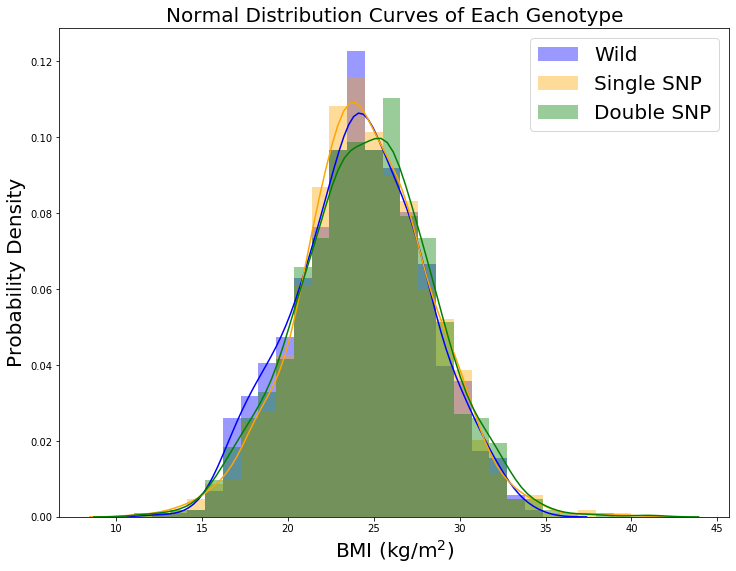

In [16]:
bins = np.linspace(10,40,num=30)
histplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=bins) 

Plot the probability density functions. 

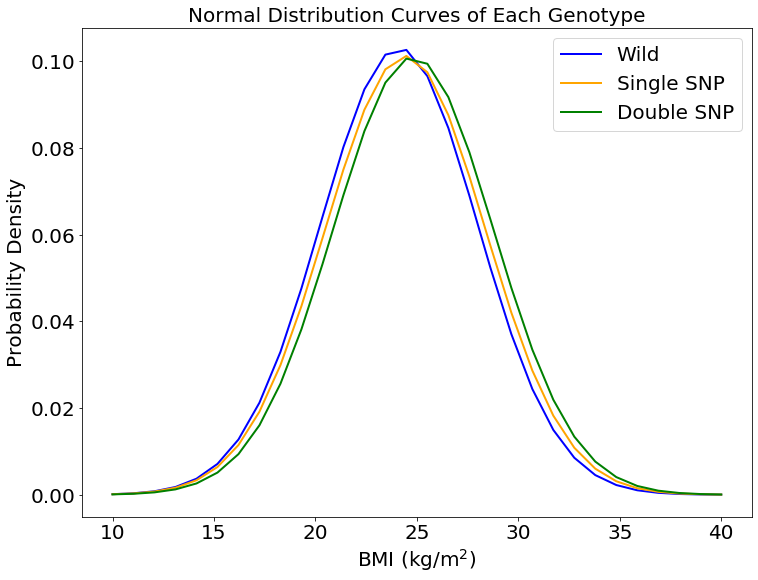

In [17]:
bins = np.linspace(10,40,num=30)
mean1 = 24.12
sd1 = 3.87
mean2 = 24.43
sd2 = 3.94
mean3 = 24.82
sd3 = 3.95
pdfplotting(mean1, sd1, mean2, sd2, mean3, sd3, bins) 

Define a function called "violinplotting" to plot 3 consecutive violin plots. 

In [18]:
def violinplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=None):
    """
    A function to plot 3 consecutive violin plots
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """ 
    #a4_dims = (12, 9)
    #fig, ax = plt.subplots(1,3,figsize=a4_dims)
    
    #ax[0,0] = sns.violinplot(data=datagenerated1, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)

    #ax[0,1] = sns.violinplot(data=datagenerated2, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)
    
    #ax[0,2] = sns.violinplot(data=datagenerated3, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)
    
    plt.figure(figsize=(12,9))
    
    ax1 = plt.violinplot(datagenerated1, positions=[1], showmeans=True)
    ax2 = plt.violinplot(datagenerated2, positions=[2], showmeans=True)
    ax3 = plt.violinplot(datagenerated3, positions=[3], showmeans=True)

    plt.xlabel('Genotype', fontsize=20)
    plt.ylabel('BMI (kg/m$^2$)', fontsize=20)
    plt.title('Effect of Genotype on Phenotype', fontsize=20)
    
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=15)

    locs, labels = plt.xticks() 
    locs = [1, 2, 3]
    labels = ['TT', 'AT', 'AA']
    plt.xticks(locs, labels) 

    return None

Plot violin plots

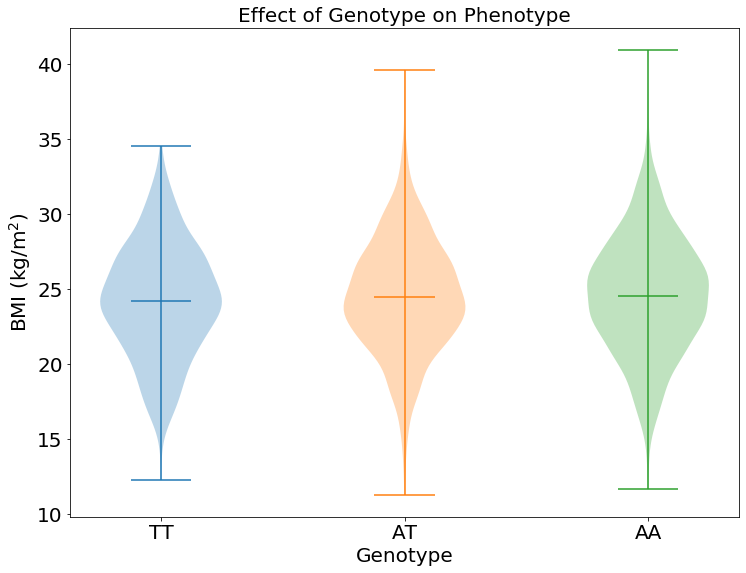

In [19]:
violinplotting(datagenerated1, datagenerated2, datagenerated3) 

Define a function called "percent_overlap" that estimates the percentage of overlap between multiple normally distributed data.

In [20]:
def percent_overlap(mean1=None,sd1=None,mean2=None,sd2=None,mean3=None,sd3=None):
    """
    A function to estimate the percentage of overlap between multiple normally distributed data.
    Parameters:
        mean1 (float, required): The mean of the first data set.
        mean2 (float, required): The mean of the second data set.
        mean3 (float, required): The mean of the third data set.
        sd1 (float, required): The standard deviation of the first data set.
        sd2 (float, required): The standard deviation of the second data set.
        sd3 (float, required): The standard deviation of the third data set.
    Returns:
        numpy.float64: A float value showing the percentage overlap between 1st and 2nd data sets.
        numpy.float64: A float value showing the percentage overlap between 1st and 3rd data sets.
        numpy.float64: A float value showing the percentage overlap between 2nd and 3rd data sets.
    """ 
    overlap_11_perc = 'The likelihood of a wild genotype null effect is {0:1.2%}'.format(NormalDist(mu=mean1, sigma=sd1).overlap(NormalDist(mu=mean1, sigma=sd1)))
    overlap_12_perc = 'The likelihood of a single SNP genotype null effect is {0:1.2%}'.format(NormalDist(mu=mean1, sigma=sd1).overlap(NormalDist(mu=mean2, sigma=sd2)))
    overlap_13_perc = 'The likelihood of a double SNP genotype null effect is {0:1.2%}'.format(NormalDist(mu=mean1, sigma=sd1).overlap(NormalDist(mu=mean3, sigma=sd3)))
    return overlap_11_perc, overlap_12_perc, overlap_13_perc

Now let's use the FTO rs9939609 genotype as an example. 

In [21]:
mean1 = 24.12
sd1 = 3.87
mean2 = 24.43
sd2 = 3.94
mean3 = 24.82
sd3 = 3.95
percent_overlap(mean1, sd1, mean2, sd2, mean3, sd3) 

('The likelihood of a wild genotype null effect is 100.00%',
 'The likelihood of a single SNP genotype null effect is 96.76%',
 'The likelihood of a double SNP genotype null effect is 92.82%')

In [22]:
type(percent_overlap(mean1, sd1, mean2, sd2, mean3, sd3))

tuple

# Alternative Approaches

In [23]:
# Example 1: FTO rs9939609 TT genotype
mean_tt = 24.12 #kg/m^2
upper_CI_tt = 0.39
lower_CI_tt = 0.27
sd_tt = 2*ci_to_sd(lower_CI_tt, upper_CI_tt, size=1000) #kg/m^2
data_tt = datagen(mean_tt, upper_CI_tt, lower_CI_tt, 1000) #kg/m^2

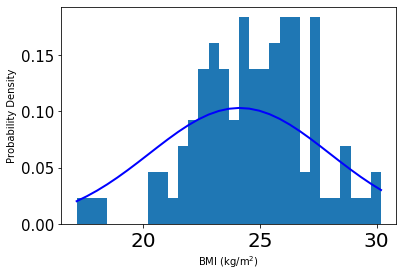

In [24]:
# Display the histogram of the samples, along with the probability density function
count, bins_tt, ignored = plt.hist(data_tt, 30, density=True) 
ax1 = plt.plot(bins_tt, 1/(sd_tt * np.sqrt(2 * np.pi)) * np.exp( - (bins_tt - mean_tt)**2 / (2 * sd_tt**2)), linewidth=2, color='b')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

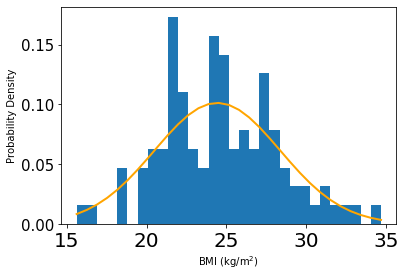

In [25]:
# Repeat for AT genotype
mean_at = 24.43 #kg/m^2
sd_at = 3.94 #kg/m^2
data_at = datagen(mean_at, sd_at, 1000) #kg/m^2
count, bins_at, ignored = plt.hist(data_at, 30, density=True) 
ax2 = plt.plot(bins_at, 1/(sd_at * np.sqrt(2 * np.pi)) * np.exp( - (bins_at - mean_at)**2 / (2 * sd_at**2)), linewidth=2, color='orange')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

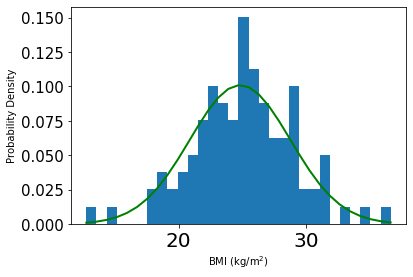

In [26]:
# Repeat for AA genotype
mean_aa = 24.82 #kg/m^2
sd_aa = 3.95 #kg/m^2
data_aa = datagen(mean_aa, sd_aa, 1000) #kg/m^2
count, bins_aa, ignored = plt.hist(data_aa, 30, density=True)
ax2 = plt.plot(bins_aa, 1/(sd_aa * np.sqrt(2 * np.pi)) * np.exp( - (bins_aa - mean_aa)**2 / (2 * sd_aa**2)), linewidth=2, color='g')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.show() 

Create violin plots for each genotype.

([<matplotlib.axis.XTick at 0x7fe070142bb0>,
 <a list of 3 Text xticklabel objects>)

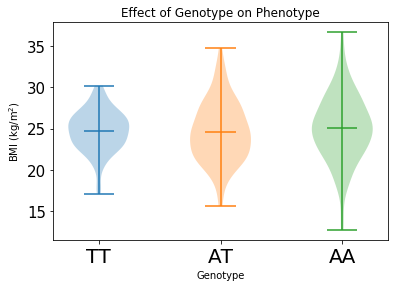

In [27]:
ax1 = plt.violinplot(data_tt, positions=[1], showmeans=True)
ax2 = plt.violinplot(data_at, positions=[2], showmeans=True)
ax3 = plt.violinplot(data_aa, positions=[3], showmeans=True)

plt.xlabel('Genotype', fontsize=10)
plt.ylabel('BMI (kg/m$^2$)', fontsize=10)
plt.title('Effect of Genotype on Phenotype')

locs, labels = plt.xticks() 
locs = [1, 2, 3]
labels = ['TT', 'AT', 'AA']
plt.xticks(locs, labels) 

Plot them all together

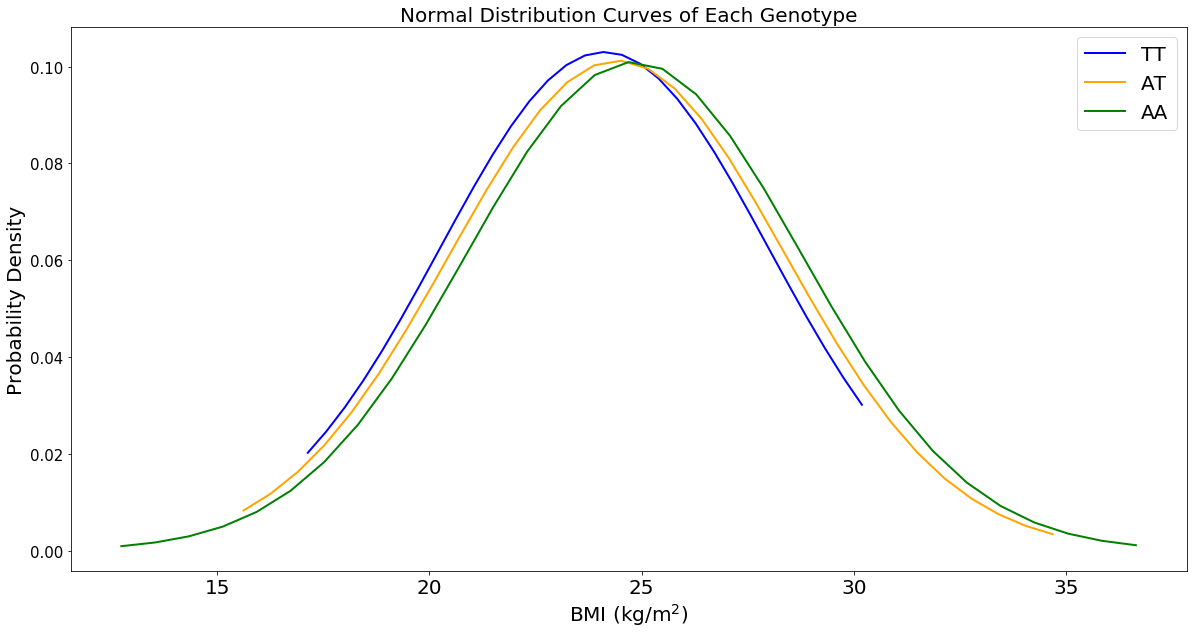

In [28]:
plt.figure(figsize=(20,10)) 

pdf_tt = 1/(sd_tt * np.sqrt(2 * np.pi)) * np.exp( - (bins_tt - mean_tt)**2 / (2 * sd_tt**2))
pdf_at = 1/(sd_at * np.sqrt(2 * np.pi)) * np.exp( - (bins_at - mean_at)**2 / (2 * sd_at**2))
pdf_aa = 1/(sd_aa * np.sqrt(2 * np.pi)) * np.exp( - (bins_aa - mean_aa)**2 / (2 * sd_aa**2))

ax1 = plt.plot(bins_tt, pdf_tt,linewidth=2, color='b', label='TT')
ax2 = plt.plot(bins_at, pdf_at,linewidth=2, color='orange', label='AT')
ax3 = plt.plot(bins_aa, pdf_aa,linewidth=2, color='g', label='AA')

plt.xlabel('BMI (kg/m$^2$)', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)
plt.title('Normal Distribution Curves of Each Genotype', fontsize=20)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

xmin1 = min(bins_tt.min(), bins_at.min())
xmax1 = max(bins_tt.max(), bins_at.max())
xmin2 = min(bins_tt.min(), bins_aa.min())
xmax2 = max(bins_tt.max(), bins_aa.max())

x1 = np.linspace(xmin1, xmax1, 31)
x2 = np.linspace(xmin2, xmax2, 31)

y1 = np.minimum(pdf_tt, pdf_at)
y2 = np.minimum(pdf_tt, pdf_aa) 

#plt.fill_between(x1, y1, color='green', alpha=0.5)
#plt.fill_between(x2, y2, color='purple', alpha=0.5)

plt.legend (fontsize=20)
plt.show() 

Define a function to alculate the area under each curve.

In [29]:
def auc(bins, pdf):
    return metrics.auc(bins, pdf) 

Calculate the area under each curve

In [30]:
# Area under TT curve
area_tt = auc(bins_tt, pdf_tt) 

In [31]:
# Area under AT curve
area_at = auc(bins_at, pdf_at) 

In [32]:
# Area under AA curve
area_aa = auc(bins_aa, pdf_aa) 

Define a function to calculate the percent overlap of each genotype curve versus the "wild" genotype TT.

In [33]:
def percent_overlap(mean_wild, sd_wild, mean_snp, sd_snp):
    return 'The likelihood of a null effect is {0:1.2%}'.format(NormalDist(mu=mean_wild, sigma=sd_wild).overlap(NormalDist(mu=mean_snp, sigma=sd_snp)))

Calculate the percent overlap of each curve versus the "wild" genotype TT.

In [34]:
# TT vs TT
percent_overlap(mean_tt, sd_tt, mean_tt, sd_tt) 

'The likelihood of a null effect is 100.00%'

In [35]:
# TT vs AT
percent_overlap(mean_tt, sd_tt, mean_at, sd_at) 

'The likelihood of a null effect is 96.76%'

In [36]:
# TT vs AA
percent_overlap(mean_tt, sd_tt, mean_aa, sd_aa)

'The likelihood of a null effect is 92.83%'